In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import optimizers
import scipy


from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [ ]:
import cv2
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
import numpy as np

Data Augmentation using OpenCV

In [ ]:
Folder_name="images"
Extension=".jpg"

In [ ]:
#RESIZE
def resize_image(image,w,h):
    image=cv2.resize(image,(w,h))
    cv2.imwrite(Folder_name+"/Resize-"+str(w)+"*"+str(h)+Extension, image)

In [ ]:
#rotation
def rotate_image(image,deg):
    rows, cols,c = image.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2), deg, 1)
    image = cv2.warpAffine(image, M, (cols, rows))
    cv2.imwrite(Folder_name + "/Rotate-" + str(deg) + Extension, image)

In [ ]:
#sharp image
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    image = cv2.filter2D(image, -1, kernel)
    cv2.imwrite(Folder_name+"/Sharpen-"+Extension, image)

In [ ]:
#flipping
def flip_image(image,dir):
    image = cv2.flip(image, dir)
    cv2.imwrite(Folder_name + "/flip-" + str(dir)+Extension, image)

In [ ]:
#brightness increasing or  decreasing
def brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    cv2.imwrite(Folder_name + "/brightness-" + str(value)+Extension, image)

In [ ]:
image_file=r"C:\Users\PRATIK PANIGRAHI\Desktop\opencv(face recognition\images\289.jpg"
image=cv2.imread(image_file)
resize_image(image,450,400)

In [ ]:
#creating new augmented image
rotate_image(image,30)
rotate_image(image,-30)
sharpen_image(image)
flip_image(image,0)
flip_image(image,1)
brightness(image, 100)
brightness(image, 120)
brightness(image, 130)
brightness(image, 150)
brightness(image, 100)
brightness(image, 80)
brightness(image, 50)

For this process i have both used jupyter notebook and google colab.

In this technique i simply passed a path of single image and i got a 12 preprocess imgages.

Previously i have around 300 images in my trainning set after scrapping from ecommerce website but after using data augmentation using opencv i got around 1621 nos of images in my trainning set.

Image Classification using CNN

In [ ]:
input_shape=(150,150,3)
img_width=150
img_height=150


nb_train_samples=1621
nb_validation_samples=82
batch_size=32
epochs=10

train_data_dir='/content/gdrive/My Drive/Colab Notebooks/Opencv_augmentation/train_image'
validation_data_dir='/content/gdrive/My Drive/Colab Notebooks/Opencv_augmentation/test_image'

In [ ]:
#rescaling data
datagen=ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_directory(
         train_data_dir,
         target_size=(img_width,img_height),
         batch_size=8,
         class_mode='categorical')

validation_generator=datagen.flow_from_directory(
         validation_data_dir,
         target_size=(img_width,img_height),
         batch_size=16,
         class_mode='categorical')

Found 1621 images belonging to 3 classes.
Found 82 images belonging to 3 classes.


In [ ]:
#model building
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#flatten layer
model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)       

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size)


Epoch 1/10
50/50 [==============================] - 132s 3s/step - loss: 1.1818 - accuracy: 0.4450 - val_loss: 0.9812 - val_accuracy: 0.6875
Epoch 2/10
50/50 [==============================] - 128s 3s/step - loss: 0.7770 - accuracy: 0.6675 - val_loss: 0.7734 - val_accuracy: 0.6250
Epoch 3/10
50/50 [==============================] - 127s 3s/step - loss: 0.8150 - accuracy: 0.6050 - val_loss: 0.4397 - val_accuracy: 0.6111
Epoch 4/10
50/50 [==============================] - 125s 3s/step - loss: 0.7376 - accuracy: 0.6400 - val_loss: 0.7822 - val_accuracy: 0.5938
Epoch 5/10
50/50 [==============================] - 19s 386ms/step - loss: 0.6584 - accuracy: 0.6776 - val_loss: 0.8952 - val_accuracy: 0.6562
Epoch 6/10
50/50 [==============================] - 13s 261ms/step - loss: 0.6829 - accuracy: 0.6550 - val_loss: 6.2587e-04 - val_accuracy: 0.7222
Epoch 7/10
50/50 [==============================] - 13s 265ms/step - loss: 0.6034 - accuracy: 0.6875 - val_loss: 0.7098 - val_accuracy: 0.7188
Ep

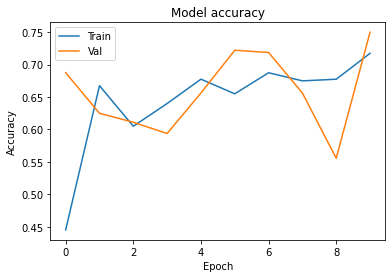

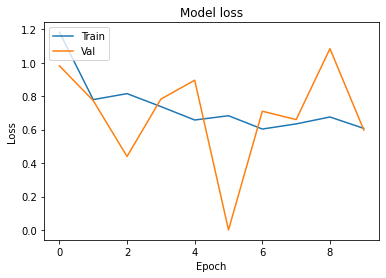

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Approach 2

In [ ]:
#rescaling data
datagen=ImageDataGenerator(rescale=1./255)

train_generator=datagen.flow_from_directory(
         train_data_dir,
         target_size=(img_width,img_height),
         batch_size=8,
         class_mode='categorical')

validation_generator=datagen.flow_from_directory(
         validation_data_dir,
         target_size=(img_width,img_height),
         batch_size=16,
         class_mode='categorical')

Found 1621 images belonging to 3 classes.
Found 82 images belonging to 3 classes.


In [ ]:
#model building
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#flatten layer
model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#model saving
model.save('variation_dropout.h5')

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("variation_dropout.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early])

Epoch 1/10
50/50 [==============================] - 17s 347ms/step - loss: 1.1872 - accuracy: 0.4750 - val_loss: 0.9202 - val_accuracy: 0.6562

Epoch 00001: val_accuracy improved from -inf to 0.65625, saving model to variation_dropout.h5
Epoch 2/10
50/50 [==============================] - 17s 335ms/step - loss: 0.7599 - accuracy: 0.6322 - val_loss: 0.4920 - val_accuracy: 0.7500

Epoch 00002: val_accuracy improved from 0.65625 to 0.75000, saving model to variation_dropout.h5
Epoch 3/10
50/50 [==============================] - 17s 336ms/step - loss: 0.5598 - accuracy: 0.7350 - val_loss: 0.8268 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.75000
Epoch 4/10
50/50 [==============================] - 17s 338ms/step - loss: 0.5560 - accuracy: 0.7300 - val_loss: 0.5164 - val_accuracy: 0.6562

Epoch 00004: val_accuracy did not improve from 0.75000
Epoch 5/10
50/50 [==============================] - 17s 339ms/step - loss: 0.5429 - accuracy: 0.7150 - val_loss: 0.2957 - v

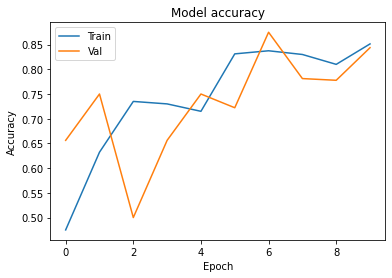

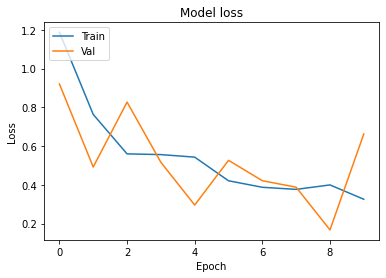

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()